# Lab 3 - Visualization

Last update: 01/11/2023

- Name: Nguyễn Phương Nam
- Student ID: 21120504

***

## Work and submission guidelines

**Work on your assignment**

- You will do your assignment directly in this notebook. First, fill in your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:** 

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [1]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer when I was a senior student
- Link: https://www.worldometers.info/coronavirus/

In [3]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: Name of the country
    - Total Cases: reported total cumulative count of detected at the time of the report
    - New Cases: new cases detected at the time of the report
    - Total Deaths: cumulative number of deaths among detected cases.
    - New Deaths: new deaths detected at the time of the report
    - Total Recovered: cumulative number of recovered among detected cases
    - Active Cases: (total cases) - (total deaths) - (recovered)
    - Critical Cases: number of critical cases among active cases at the time of the report
    - Total Tests: cumulative number of tests performed
    - Population: population of the country at the time of the report
 
- Check the data with `info()` function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [5]:
# TODO: drop New Cases, New Deaths, Critical Cases
#raise NotImplementedError('not implemented')

del df['New Cases']
del df['New Deaths']
del df['Critical Cases']

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [6]:
# TODO: convert data to integer. if the converter returns error, leave it a None
#raise NotImplementedError('not implemented')

# convert data to integer. if the converter returns error, leave it a None
for col in df.columns[1:]:
    # Some columns might have a space, comma, plus sign, negative sign, or dot in numbers. So, we need to remove them first.
    # Then, we can automatically convert the data to integer using to_numeric() function.
    # If the converter returns error, we set the value to None using errors='coerce'.
    df[col] = pd.to_numeric(df[col].str.replace('[,.\+\- ]', '', regex=True), errors='coerce')

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

Because some missing values hide in the form of string (e.g. some cells contain "  "). Therefore, when we use errors='coerce' in pd.to_numeric, these values show up as NaN.

In [7]:
# TODO: fill in the missing data with median value
#raise NotImplementedError('not implemented')

# fill in the missing data with median value
for col in df.columns[1:]:
    df[col] = df[col].fillna(df[col].median())

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?

Because we fill in missing values with median value of each column, and median value might be a float number if the number of values in the column is even.

In [8]:
# TODO: save your new data frame to `./data/new_data.csv`
#raise NotImplementedError('not implemented')
df.to_csv('./data/new_data.csv', index=False)

In [9]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [10]:
# # un-comment these lines of code
# df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


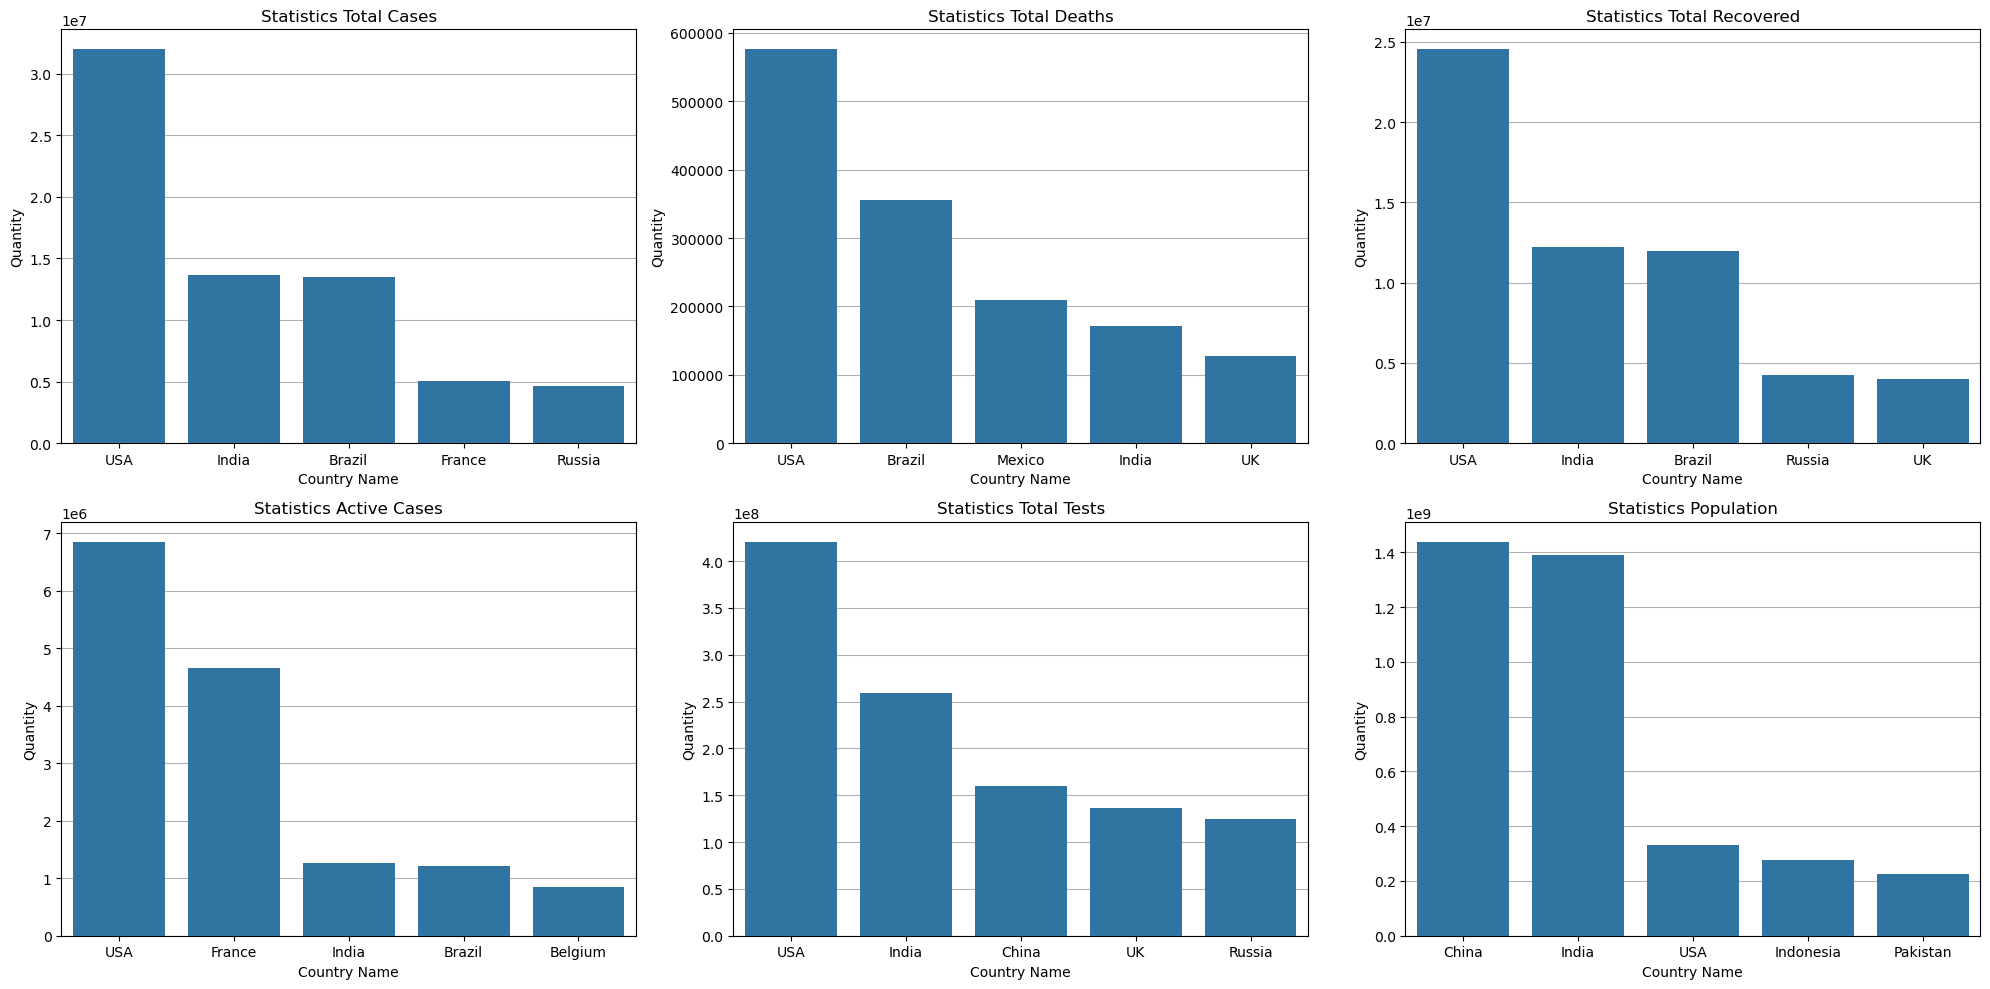

In [11]:
# TODO: draw 6 bar charts
#raise NotImplementedError('not implemented')

# 6 bar charts are arranged in 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns[1:7]):
    axes[i].set_title("Statistics " + col)
    axes[i].set_xlabel("Country Name")
    axes[i].set_ylabel("Quantity")
    axes[i].grid(axis='y', zorder=0)

    sn.barplot(x="Country Name", y=col, 
            data=df.sort_values(by=col, ascending=False).head(5), # Take the top 5 countries with the highest value
            ax=axes[i], 
            zorder=3) # Put the bar on top of the grid lines
fig.tight_layout()
plt.show()

**TODO**: Comment about the chart

- USA is the country that is most heavily affected by Covid-19
- Followed by India, Brazil

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which show the number of cases for each country. Specifically, you are provided a file named `coord.csv` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

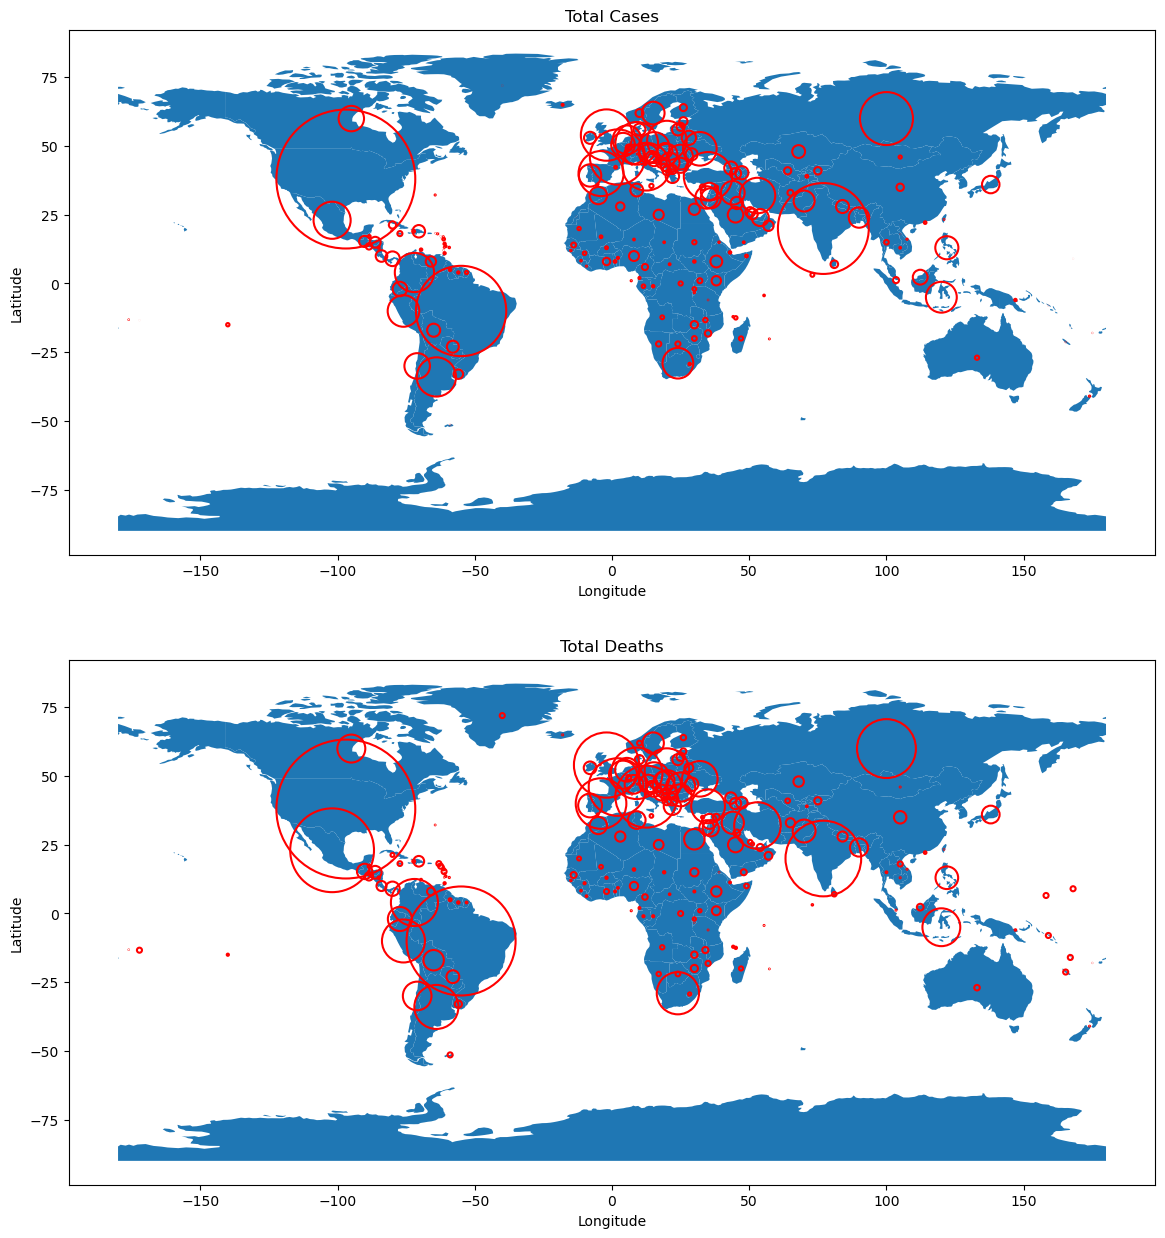

In [12]:
# TODO: draw 2 world map chart using geopandas
# raise NotImplementedError('not implemented')

# Read latitude and longitude data from json file
with open('./data/coord.json') as json_file:
    coord = json.load(json_file)

# latitudes and longitudes are dictionaries with country names as keys
latitudes = coord['lat']
longitudes = coord['long']

# draw a world map with circles which show the number of cases for each country. (Draw two maps, one for total cases and one for total deaths)
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
axes = axes.flatten()

# Use geopandas to take the world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

for i, col in enumerate(df.columns[1:3]):
    axes[i].set_title(col)
    axes[i].set_xlabel("Longitude")
    axes[i].set_ylabel("Latitude")

    world.plot(ax=axes[i])

    for j, country in enumerate(df["Country Name"]):
        if country in latitudes and country in longitudes:
            # Normalize the data to make the circle size more reasonable   
            data_range = df[col].max() - df[col].min()
            normalized_data = (df[col][j] - df[col].min()) / data_range
            scale = normalized_data * 10000
            
            axes[i].scatter(longitudes[country], latitudes[country], s=scale, edgecolors='r', facecolors='none', linewidths=1.5)

plt.show()

**TODO**: Comment about the chart

- The majority of infections are concentrated in the Americas, Europe, and India at the time of the report.
- The number of deaths is also relatively high in these areas.
- The covid-19 is also spreading in Africa, but the number of cases and deaths is not as high because the population is not as dense as in other areas.
- Countries in Asia and Australia are relatively less affected by the pandemic.

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

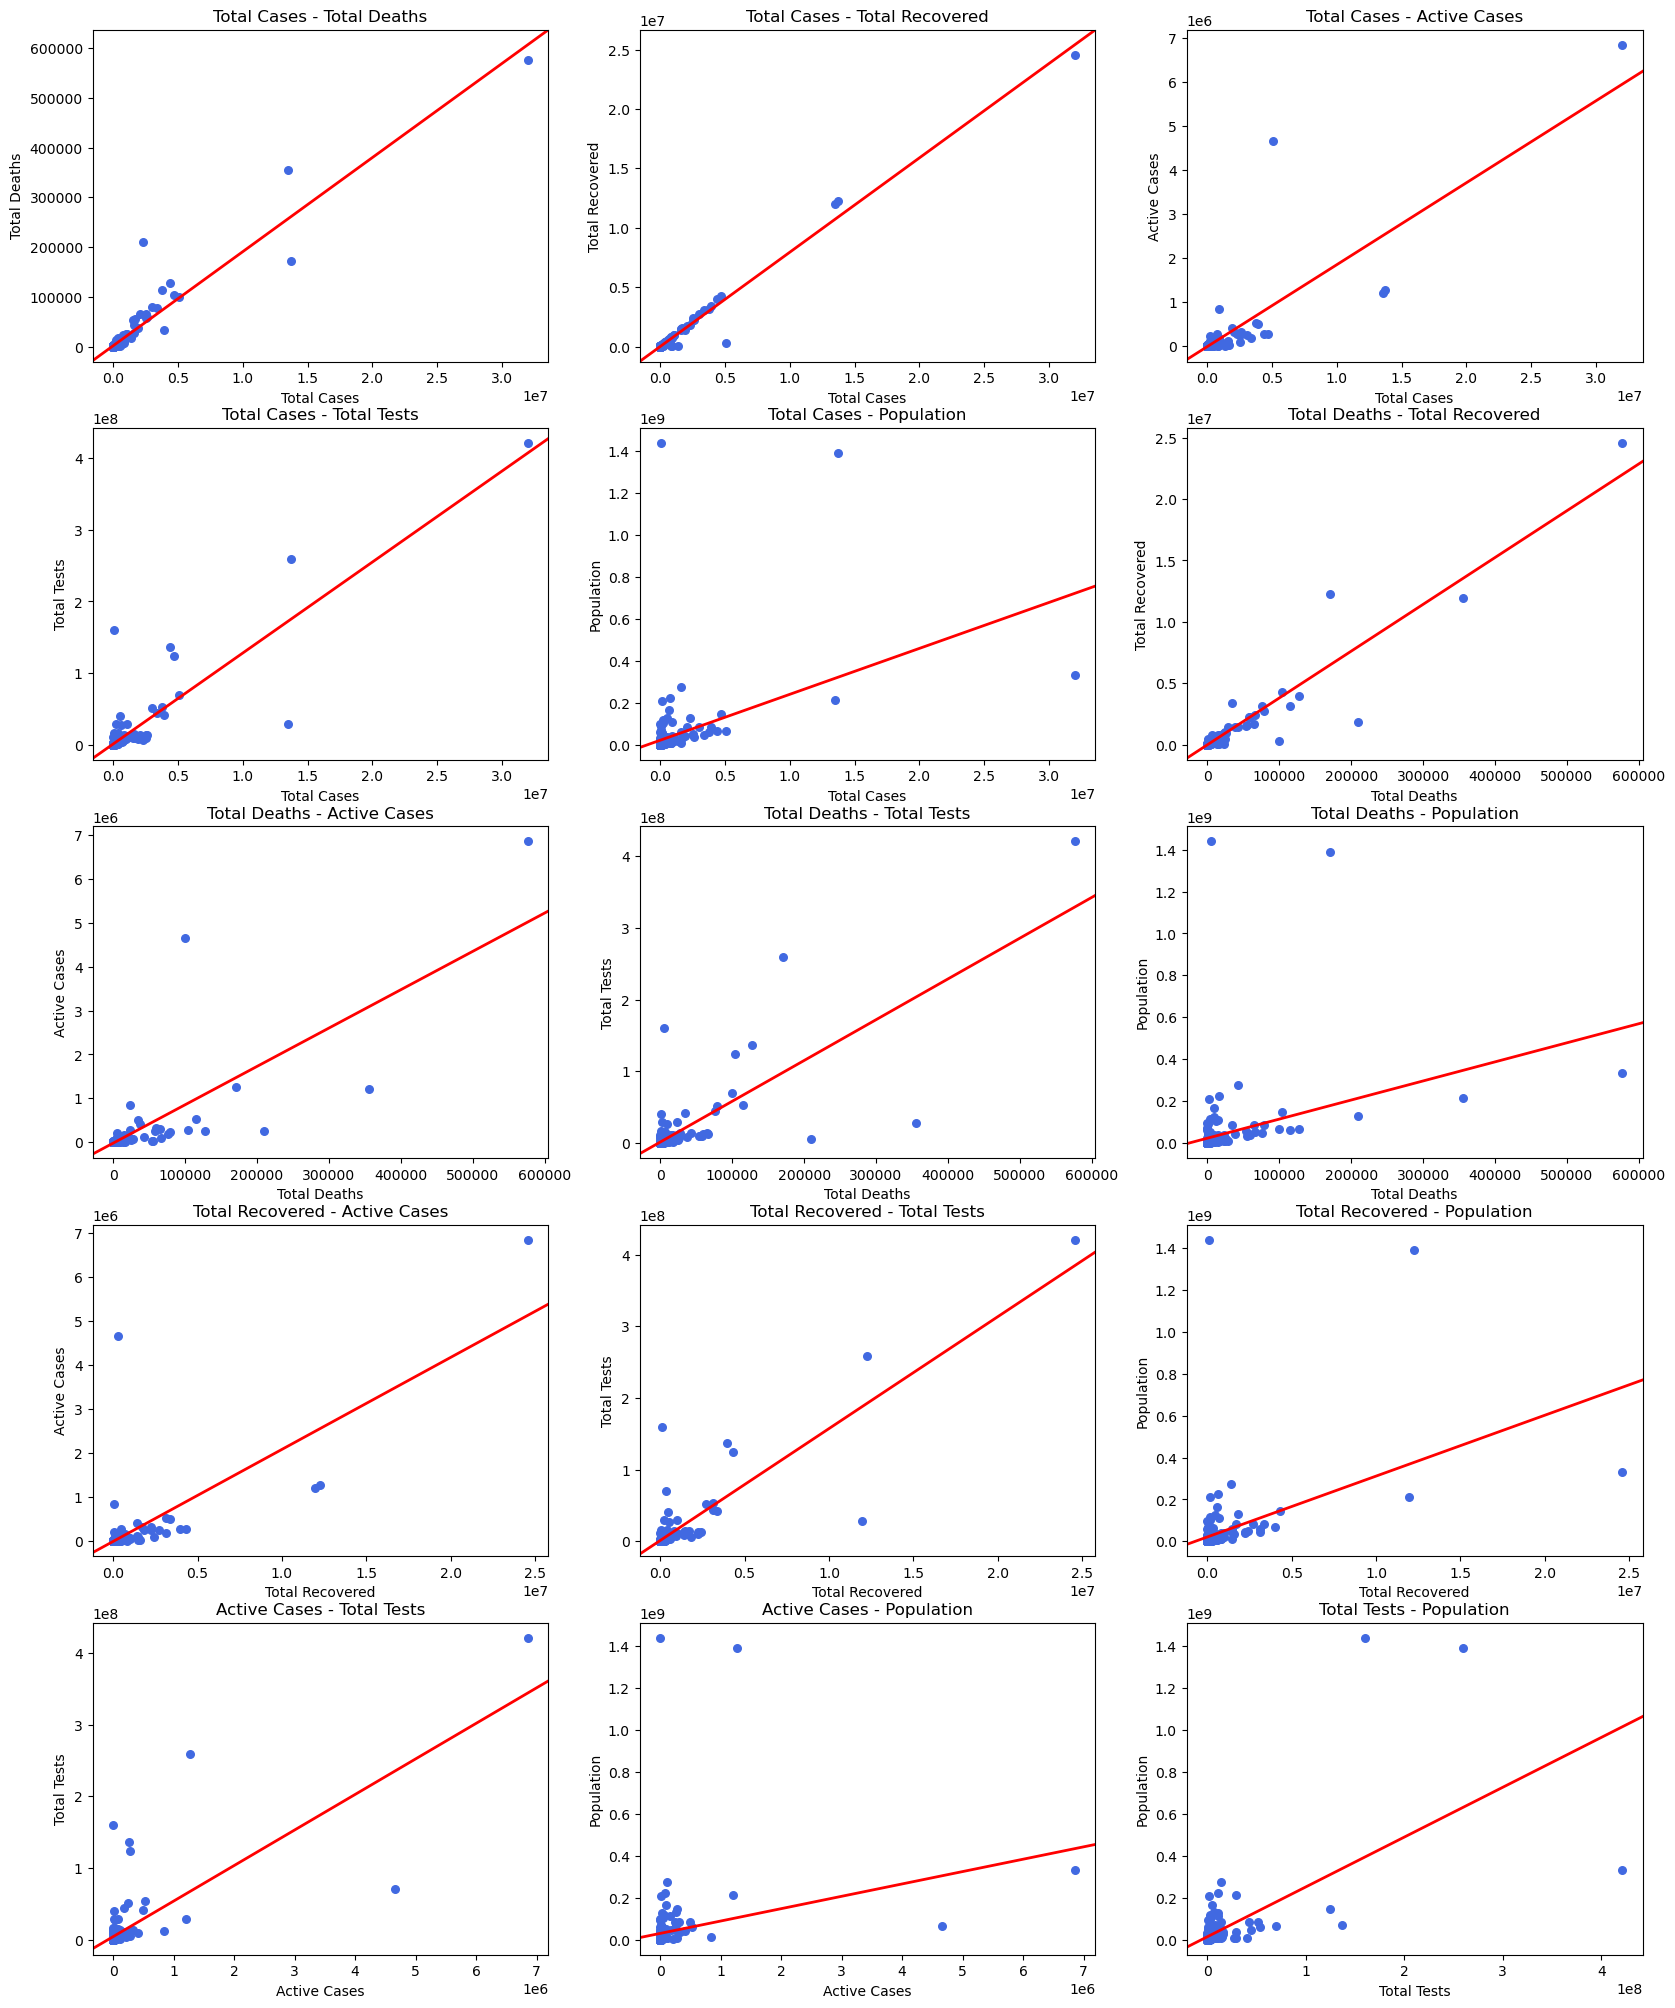

In [13]:
# TODO: scatter stuff
# raise NotImplementedError('not implemented')

# 15 scatter plots are arranged in 5 rows and 3 columns
fg, axes = plt.subplots(5, 3, figsize=(20, 25))
axes = axes.flatten()
# Create a variable to keep track of the current axis
i_axes = 0

# Loop through all columns
for i, col1 in enumerate(df.columns[1:-1]):
    # Pair the current column with all columns after it
    # i + 2 because i + 1 is the current column (first column is Country Name)
    for col2 in df.columns[i + 2:]:
        axes[i_axes].set_title(col1 + " - "  + col2)
        axes[i_axes].set_xlabel(col1)
        axes[i_axes].set_ylabel(col2)

        axes[i_axes].scatter(df[col1], df[col2], s=30, color='royalblue')

        # Create a line using least square method
        x = df[col1]
        y = df[col2]
        A = np.vstack([x, np.ones(len(x))]).T
        # y = mx + b = Ap (p = [m, b])
        # p = (A^T A)^-1 A^T y
        p = np.linalg.inv(A.T @ A) @ A.T @ y
        x = np.array([0, np.max(x)])
        # y = mx + b
        y = p[0] * x + p[1]
    
        axes[i_axes].axline((x[0], y[0]), (x[1], y[1]), color='red', linewidth=2)
        i_axes += 1

plt.show()

**TODO**: As showed above, give your prediction about the relationship between each pair.

- Total Cases and Total Deaths: positive correlation
- Total Cases and Total Recovered: positive correlation
- Total Cases and Active Cases: positive correlation
- Total Cases and Total Tests: positive correlation
- Total Cases and Population: does not have any correlation
- Total Deaths and Total Recovered: positive correlation
- Total Deaths and Active Cases: slightly positive correlation
- Total Deaths and Total Tests: does not have any correlation
- Total Deaths and Population: does not have any correlation
- Total Recovered and Active Cases: slightly positive correlation
- Total Recovered and Total Tests: weak positive correlation
- Total Recovered and Population: does not have any correlation
- Active Cases and Total Tests: does not have any correlation
- Active Cases and Population: does not have any correlation
- Total Tests and Population: does not have any correlation

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

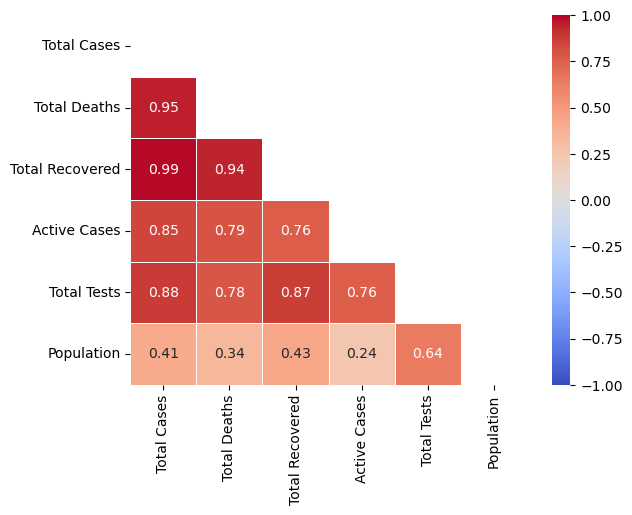

In [14]:
# TODO: create heatmap
# raise NotImplementedError('not implemented')

# Create a correlation matrix using pandas
corr = df.iloc[:, 1:].corr()
# remove upper triangle which is duplicated
mask = np.triu(np.ones_like(corr, dtype=bool))
sn.heatmap(corr, mask = mask, linewidths=0.5, cmap='coolwarm', vmax=1, vmin=-1, annot=True)
plt.show()

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

Because we cannot feed the whole dataset into the model at once. Therefore, we have to split the dataset into batches, and feed each batch into the model.

In [15]:
# TODO: download training, testing data and store them into training_data and testing_data
training_data = datasets.MNIST(root='./data',
                               train=True,
                               transform=ToTensor(),
                               download=True)
testing_data = datasets.MNIST(root='./data', 
                                train=False, 
                                transform=ToTensor(),
                                download=True)
# Then, create train_dataloader and test_dataloader with batch_size=32
batch_size = 32
train_dataloader = DataLoader(dataset=training_data,
                              batch_size=batch_size,
                              shuffle=True)
test_dataloader = DataLoader(dataset=testing_data, 
                                batch_size=batch_size, 
                                shuffle=False)
# raise NotImplementedError('not implemented')

- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

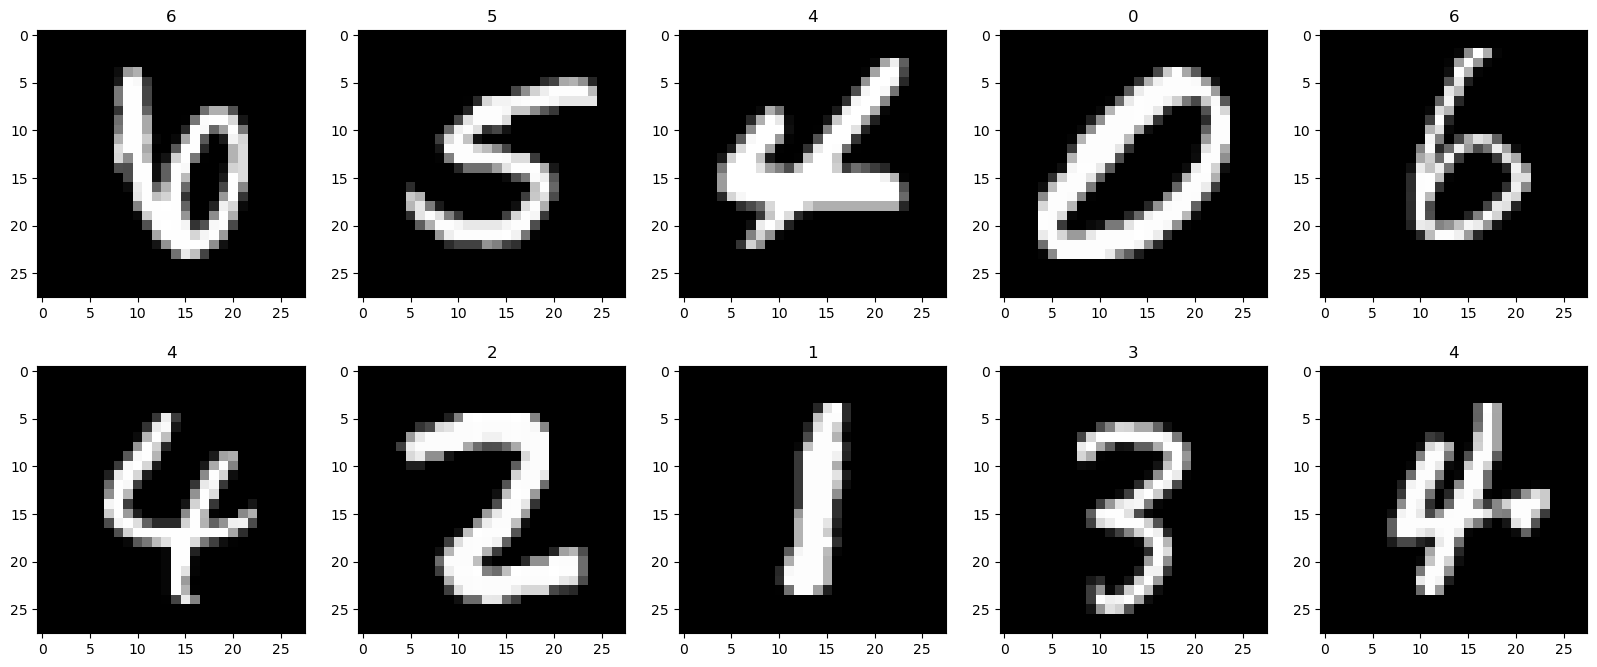

In [16]:
# TODO: visualize 10 random samples
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i in range(10):
    index = random.randint(0, len(training_data))
    # Image has shape (1, 28, 28) because it is a grayscale image and has only one channel
    # So, we need to use squeeze() to remove the first dimension
    axes[i].imshow(training_data[index][0].squeeze(), cmap='gray')
    # The label is the second element of the tuple
    axes[i].set_title(training_data[index][1])
plt.show()
# raise NotImplementedError('not implemented')


### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [17]:
# TODO: create Mnist_FC and Mnist_CNN
# raise NotImplementedError('not implemented')

class Mnist_FC(nn.Module):
    def __init__(self, input_size=28*28, num_classes = 10, hidden_size1 = 1024, hidden_size2 = 512) -> None:
        # Initialize the network
        super(Mnist_FC, self).__init__()

        # First fully connected layer with ReLU activation function
        self.fc1 = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU()
        )
        # Second fully connected layer with ReLU activation function
        self.fc2 = nn.Sequential(
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU()
        )
        # Last fully connected layer with LogSoftmax activation function. This activation function is implemented inside the loss function (nn.CrossEntropyLoss()) so we don't need to add it here.
        self.fc3 = nn.Linear(hidden_size2, num_classes)



    def forward(self, x):
        # Reshape n images with shape (1, 28, 28) to n vectors with shape (784)
        out = x.reshape(x.size(0), -1)
        # Forward pass
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out 

class Mnist_CNN(nn.Module):
    def __init__(self, input_shape=[1, 28, 28], num_classes=10, 
                 num_filters1=20, kernel_size1=5, pool_kernel_size1=2, 
                 num_filters2=20, kernel_size2=5, pool_kernel_size2=2) -> None:
        # Initialize the network
        super(Mnist_CNN, self).__init__()

        # Number of channels of the input image is the first element of input_shakpe
        num_channels = input_shape[0]
        # First convolutional layer with ReLU activation function and max pooling 
        self.conv1 = nn.Sequential(
            nn.Conv2d(num_channels, num_filters1, kernel_size=kernel_size1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=pool_kernel_size1))
        # Second convolutional layer with ReLU activation function and max pooling
        self.conv2 = nn.Sequential(
            nn.Conv2d(num_filters1, num_filters2, kernel_size=kernel_size2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=pool_kernel_size2))
        
        # Formula to calculate a dimension of the output of a convolutional layer:
        # (n - f + 2p)/s + 1  - n is the dimension of the input, f is the filter size, p is the padding, s is the stride
        # In max pooling, default stride is kernel_size so we have this division of pool_kernel_size
        num_neurons =  (num_filters2  # Final number of channels
                       * # Height:
                       ((input_shape[1] - kernel_size1 + 1)/pool_kernel_size1 # First convolutional layer
                        - kernel_size2 + 1)/pool_kernel_size2  # Second convolutional layer
                       * # Width:
                       ((input_shape[2] - kernel_size1 + 1)/pool_kernel_size1 # First convolutional layer
                           - kernel_size2 + 1)/pool_kernel_size2  # Second convolutional layer
        )
        # Check num_neurons is an integer
        assert num_neurons == int(num_neurons), "num_neurons must be integer, not " + str(num_neurons) + ". Please change the parameters of the network."
        # Convert num_neurons to integer
        num_neurons = int(num_neurons)
        
        # Last fully connected layer with LogSoftmax activation function. This activation function is implemented inside the loss function (nn.CrossEntropyLoss()) so we don't need to add it here.
        self.fc = nn.Linear(num_neurons, num_classes)

    def forward(self, x):
        # Forward pass 
        out = self.conv1(x)
        out = self.conv2(out)

        # Reshape the output of the last convolutional layer to a vector
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

- Parameters of train function:
    - model: the model that we want to train
    - Dataloader: the dataloader that contains training data
    - loss_fn: the loss function that will be used to calculate loss of the model
    - optimizer: the optimizer that will be used to update the weights of the model
- Parameters of test function:
    - model: the model that we want to test
    - dataloader: the dataloader that contains testing data
- We have to use torch.no_grad() because we do not want to keep track of the gradients of the model during testing. Without this line of code, the gradients will be calculated, which affects the training process in the next epoch.

In [18]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

def train(dataloader, model, loss_fn, optimizer):
    correct = 0
    total = 0
    for images, labels in dataloader:
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        # Calculate loss
        loss = loss_fn(outputs, labels)

        # Clears x.grad for every parameter x in the optimizer. It’s important to call this before loss.backward(), otherwise we’ll accumulate the gradients from multiple passes.
        optimizer.zero_grad()
        # Backward and optimize
        loss.backward()
        optimizer.step()

        # Using torch.no_grad() to prevent tracking gradients in validation
        with torch.no_grad():
            # torch.max at dim=1 returns a tuple (values, indices) of the maximum value in the row, which is (highest predicted value, predicted class) of each image
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            # Calculate current correct predictions
            correct += (predicted == labels).sum().item()
            
    return correct * 1.0/total
    # raise NotImplementedError('not implemented')

def test(dataloader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            # Move tensors to the configured device
            images = images.to(device)
            labels = labels.to(device)
            # Forward pass
            outputs = model(images)
            # torch.max at dim=1 returns a tuple (values, indices) of the maximum value in the row, which is (highest predicted value, predicted class) of each image
            _, predicted = torch.max(outputs.data, 1)
            # Total number of labels
            total += labels.size(0)
            # Calculate current correct predictions
            correct += (predicted == labels).sum().item()
            
    return correct * 1.0 / total
    # raise NotImplementedError('not implemented')

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

- Some loss functions: CrossEntropyLoss, NLLLoss, MSELoss, L1Loss, BCELoss, ...
- Some optimizers: SGD, Adam, Adagrad, Adadelta, ...

In [19]:
print("========== FC model ==========")

# Hyperparameters for Mnist_FC
image_size = 28 * 28
num_classes = 10
hidden_size1 = 1024
hidden_size2 = 512
learning_rate = 1e-3
num_epochs = 20

# Define model
fc_model = Mnist_FC(image_size, num_classes, hidden_size1, hidden_size2).to(device) # Move the model to the configured device
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(fc_model.parameters(), lr=learning_rate)
history_fc = {}

# TODO: run 20 epochs for Mnist_FC
for epoch in range(num_epochs): 
    train_acc = train(train_dataloader, fc_model, loss_fn, optimizer)
    test_acc = test(test_dataloader, fc_model)

    history_fc[epoch + 1] = [train_acc, test_acc]
    print("Epoch ", epoch + 1)
    print("-------------------------------")
    print("Training acc: ", train_acc)
    print("Testing_acc: ", test_acc)
    print()



print("========== CNN model ==========")

# Hyperparameters for Mnist_CNN
image_shape = [1, 28, 28]
num_classes = 10
num_filters1 = 20
kernel_size1 = 5
pool_kernel_size1 = 2
num_filters2 = 20
kernel_size2 = 5
pool_kernel_size2 = 2
learning_rate = 1e-3
num_epochs = 20

# Define model
cnn_model = Mnist_CNN(image_shape, num_classes, 
                      num_filters1, kernel_size1, pool_kernel_size1, 
                      num_filters2, kernel_size2, pool_kernel_size2).to(device) # Move the model to the configured device
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=learning_rate)
history_cnn = {}


# TODO: run 20 epochs for Mnist_CNN
for epoch in range(num_epochs):
    train_acc = train(train_dataloader, cnn_model, loss_fn, optimizer)
    test_acc = test(test_dataloader, cnn_model)

    history_cnn[epoch + 1] = [train_acc, test_acc]
    print("Epoch ", epoch + 1)
    print("-------------------------------")
    print("Training acc: ", train_acc)
    print("Testing_acc: ", test_acc)
    print()
# raise NotImplementedError('not implemented')

========== FC model ==========
Epoch  1
-------------------------------
Training acc:  0.48168333333333335
Testing_acc:  0.6409

Epoch  2
-------------------------------
Training acc:  0.6718666666666666
Testing_acc:  0.7226

Epoch  3
-------------------------------
Training acc:  0.7430333333333333
Testing_acc:  0.782

Epoch  4
-------------------------------
Training acc:  0.7980333333333334
Testing_acc:  0.8212

Epoch  5
-------------------------------
Training acc:  0.83185
Testing_acc:  0.8485

Epoch  6
-------------------------------
Training acc:  0.8538166666666667
Testing_acc:  0.8668

Epoch  7
-------------------------------
Training acc:  0.8687333333333334
Testing_acc:  0.8773

Epoch  8
-------------------------------
Training acc:  0.8783666666666666
Testing_acc:  0.8871

Epoch  9
-------------------------------
Training acc:  0.8849666666666667
Testing_acc:  0.8902

Epoch  10
-------------------------------
Training acc:  0.8904
Testing_acc:  0.8956

Epoch  11
-----------

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

- The CNN model has a higher accuracy than the FC model.
- The CNN model converges faster than the FC model.
- The CNN model runs faster than the FC model.

CNN model is the better choice for image classification.

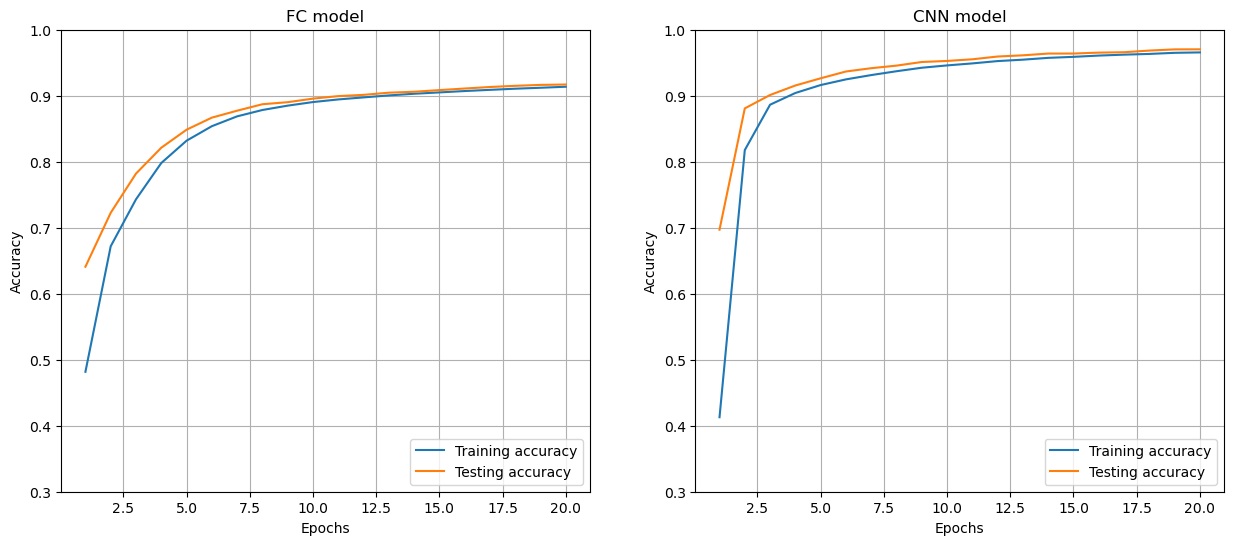

In [20]:
# TODO: visualize the history
# change style of plots

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes = axes.flatten()

# Plot the training accuracy and testing accuracy of fc_model
axes[0].set_title("FC model")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim([0.3, 1])
axes[0].plot(list(history_fc.keys()), [history_fc[i][0] for i in history_fc.keys()], label="Training accuracy")
axes[0].plot(list(history_fc.keys()), [history_fc[i][1] for i in history_fc.keys()], label="Testing accuracy")
axes[0].legend(loc='lower right')
axes[0].grid()

# Plot the training accuracy and testing accuracy of cnn_model
axes[1].set_title("CNN model")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim([0.3, 1])
axes[1].plot(list(history_cnn.keys()), [history_cnn[i][0] for i in history_cnn.keys()], label="Training accuracy")
axes[1].plot(list(history_cnn.keys()), [history_cnn[i][1] for i in history_cnn.keys()], label="Testing accuracy")
axes[1].legend(loc='lower right')
axes[1].grid()

plt.show()
# raise NotImplementedError('not implemented')

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` using Colab